## Practise - 8/2/2021

## Bull-dozer Data set 


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [7]:
## get the data 

bull_dozer = pd.read_csv("data/TrainAndValid.csv",
                          low_memory=False,
                          parse_dates = ["saledate"])
bull_dozer.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


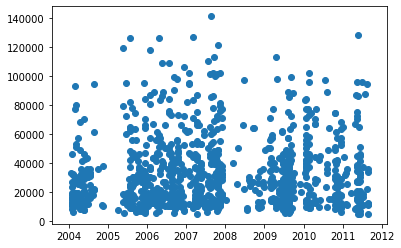

In [10]:
## plot saledate and saleprice 


fig,ax = plt.subplots()
plt.scatter(bull_dozer["saledate"][:1000],bull_dozer["SalePrice"][:1000])

In [11]:
## check for datatypes 

bull_dozer.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [12]:
## check for missing values 

bull_dozer.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [19]:
## let's do some feature engineering by adding our own features 

bull_dozer["saleyear"] = bull_dozer["saledate"].dt.year
bull_dozer["salemonth"] = bull_dozer["saledate"].dt.month
bull_dozer["saleday"] = bull_dozer["saledate"].dt.day
bull_dozer["saleweekofyear"] = bull_dozer["saledate"].dt.weekofyear
bull_dozer["saledayofweek"] = bull_dozer["saledate"].dt.dayofweek
bull_dozer["saledayofyear"] = bull_dozer["saledate"].dt.dayofyear
bull_dozer.drop("saleweekofyear",axis=1,inplace=True)

In [20]:
bull_dozer

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,16,3
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,26,4
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,26,3
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,19,3
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,Double,NaN,NaN,NaN,NaN,NaN,2012,3,7,2
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,Double,NaN,NaN,NaN,NaN,NaN,2012,1,28,5
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,Double,NaN,NaN,NaN,NaN,NaN,2012,1,28,5
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,Double,NaN,NaN,NaN,NaN,NaN,2012,3,7,2


In [24]:
## let's reduce some data 

bull_dozer_new = bull_dozer[:200000]
len(bull_dozer_new)
bull_dozer_new

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,16,3
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,26,4
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,26,3
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,19,3
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1638666,21000.0,1275582,4605,132,1.0,2001,NaN,NaN,2008-08-27,...,NaN,NaN,NaN,NaN,NaN,NaN,2008,8,27,2
199996,1638667,28000.0,1382111,4604,132,1.0,2001,NaN,NaN,2007-05-03,...,NaN,NaN,NaN,NaN,NaN,NaN,2007,5,3,3
199997,1638668,27500.0,1240002,4764,132,1.0,2001,NaN,NaN,2010-09-02,...,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2010,9,2,3
199998,1638669,26000.0,1277631,1861,132,1.0,2001,NaN,NaN,2008-09-16,...,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2008,9,16,1


In [25]:
## check the datatypes 

bull_dozer_new.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [26]:
## check the object datatype here is string or categorical 

pd.api.types.is_string_dtype(bull_dozer_new["state"])

True

In [33]:
## check for every columns 

for label,content in bull_dozer_new.items():
    if(pd.api.types.is_string_dtype(content)):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [37]:
## convert the object datatype to category 

for label,content in bull_dozer_new.items():
    if(pd.api.types.is_string_dtype(content)):
        bull_dozer_new[label] = content.astype('category').cat.as_ordered()

F:\Softwares\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [38]:
bull_dozer_new.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                         category
saledate                    datetime64[ns]
fiModelDesc                       category
fiBaseModel                       category
fiSecondaryDesc                   category
fiModelSeries                     category
fiModelDescriptor                 category
ProductSize                       category
fiProductClassDesc                category
state                             category
ProductGroup                      category
ProductGroupDesc                  category
Drive_System                      category
Enclosure                         category
Forks                             category
Pad_Type   

In [39]:
bull_dozer_new.drop("saledate",axis=1,inplace=True)

F:\Softwares\anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
bull_dozer_new["saledate"]

KeyError: 'saledate'

In [52]:
## remove missing values 

for label,content in bull_dozer_new.items():
    if(pd.api.types.is_numeric_dtype(content)):
        print(label)
        bull_dozer_new[label] = content.fillna(content.median())

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek


F:\Softwares\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
bull_dozer_new.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   172435
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc              52984
fiModelSeries               186185
fiModelDescriptor           167769
ProductSize                 107837
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                138011
Enclosure                       64
Forks                       101274
Pad_Type                    153662
Ride_Control                113886
Stick                       153662
Transmission                 93144
Turbocharged                153662
Blade_Extension             184355
Blade_Width         

In [55]:
## remove categorical missing values and will also change the datatype to numeric 

for label,content in bull_dozer_new.items():
    if(pd.api.types.is_string_dtype(content)):
        bull_dozer_new[label] = pd.Categorical(content).codes + 1

F:\Softwares\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [56]:
bull_dozer_new.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                      int8
fiModelDesc                   int16
fiBaseModel                   int16
fiSecondaryDesc                int8
fiModelSeries                  int8
fiModelDescriptor              int8
ProductSize                    int8
fiProductClassDesc             int8
state                          int8
ProductGroup                   int8
ProductGroupDesc               int8
Drive_System                   int8
Enclosure                      int8
Forks                          int8
Pad_Type                       int8
Ride_Control                   int8
Stick                          int8
Transmission                   int8
Turbocharged                   int8
Blade_Extension             

In [57]:
bull_dozer_new.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

In [61]:
## chhoosse a model 

from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor()

model.fit(bull_dozer_new.drop("SalePrice",axis=1),bull_dozer_new["SalePrice"])

MemoryError: could not allocate 14680064 bytes